# 베르누이 분포

### 베르누이 시도

결과가 성공 혹은 실패 두가지 중 하나로만 나오는 것을 베르누이 시도라고 한다.

예를 들어 동전을 한 번 던져 앞면이 나오거나 뒷면이 나오게 되는 것은 베르누이 시도의 일종이다. 

_ _

베르누이 시도의 결과를 확률별순 X로 나타낼 떄는 일반적으로 성공은 정수 1 실패는 정수 0 으로 정한다. 

### 베르누이 분포

베르누이 확률변수는 0,1 두 가지 값 중 하나만 가질 수 있으므로 이산 확률변수이다.

따라서 확률 질량함수로 정의할 수 있다.

베르누이 분포의 확률 질량함수는 다음과 같다.

$$
\text{Bern}(x;\theta) = 
\begin{cases} 
\theta   & \text{if }x=1, \\
1-\theta & \text{if }x=0
\end{cases}
$$


### 베르누이 분포의 시뮬레이션

In [2]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# 확률을 0.6으로 설정
theta = 0.6
rv = stats.bernoulli(theta)

pmf 메서드를 사용하여 질량 함수를 계산

Text(0,0.5,'p(x)')

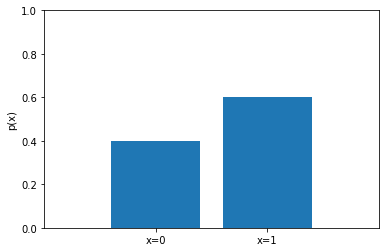

In [3]:
xx =[0,1]
plt.bar(xx,rv.pmf(xx))
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0,1],['x=0','x=1'])
plt.ylabel('p(x)')


In [4]:
x = rv.rvs(100,random_state=0)

In [5]:
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [6]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,시뮬레이션,이론
0,0.38,0.4
1,0.62,0.6


_ _ 

# 이항분포

성공확률이 θ인 베르누이 시도를 N번 하는 경우 가장 운이좋을때는 N번 모두 성공할 것이고 가장 운이 나쁜 경우에는 한 번도 성공하지 못한다. 

N번 중 성공한 횟수를 확률변수 X라고 한다면 X의 값은 0부터 N까지의 정수 중 하나가 된다.

_ _

### 베르누이 분포의 시뮬레이션

In [7]:
#binom 이항분포 클래스
n = 10
theta = 0.6
rv = stats.binom(n,theta)

<Container object of 11 artists>

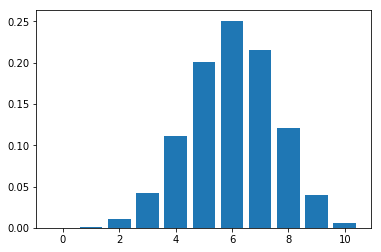

In [8]:
xx = np.arange(n+1)
plt.bar(xx,rv.pmf(xx))

In [9]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

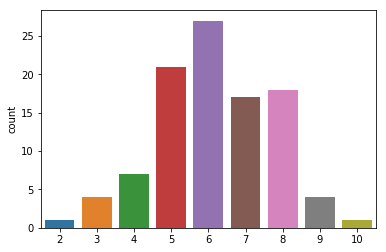

In [10]:
sns.countplot(x)

In [11]:
#이론과 시뮬레이션 비교
y = np.bincount(x, minlength=n+1)/float(len(x))
df = pd.DataFrame({"the": rv.pmf(xx), "simul": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,simul,0.000000
1,0,the,0.000105
2,1,simul,0.000000
3,1,the,0.001573
4,2,simul,0.010000
5,2,the,0.010617
6,3,simul,0.040000
7,3,the,0.042467
8,4,simul,0.070000
9,4,the,0.111477


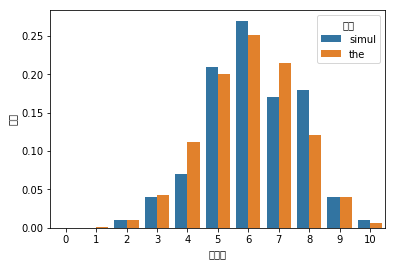

In [12]:
#이론과 시뮬레이션의 약간의 차이가 존재함
sns.barplot(x="표본값", y="비율", hue="유형", data=df)

_ _

# 카테고리 분포

카테고리 분포는 베르누이 분포의 확장판이다.

베르누이 분포가 0 이나 1이 나오는 확률변수의 분표였다면

카테고리 분포는 1 부터 k개의 정수 값 중 하나가 나오는 확률변수의 분포이다.

예를 들어 주사위를 생각하면 k = 6이다.

_  _

주의할 점은 카테고리 분포는 카테고리인 스칼라 값을 출력하는 확률 변수지만

보통 다음과 같이 1과 0으로만 이루어진 다차원 벡터 형태로 인코딩한 값을 

출력하는 벡터확률 변수를 사용한다.

$$ 
\begin{eqnarray}
x = 1  \;\; & \rightarrow & \;\; x = (1, 0, 0, 0, 0, 0) \\
x = 2  \;\; & \rightarrow & \;\; x = (0, 1, 0, 0, 0, 0) \\
x = 3  \;\; & \rightarrow & \;\; x = (0, 0, 1, 0, 0, 0) \\
x = 4  \;\; & \rightarrow & \;\; x = (0, 0, 0, 1, 0, 0) \\
x = 5  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 1, 0) \\
x = 6  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 0, 1) \\
\end{eqnarray}
$$

이러한 인코딩 방식을 One-Hot-Encoding 이라고 한다.

### 카테고리 분포의 시뮬레이션

SciPy는 카테고리 분포를 위한 별도의 클래스를 제공하지 않는다. 하지만 뒤에서 설명할 다항 분포를 위한 multinomial 클래스에서 시행 횟수를 1로 설정하면 카테고리 분포가 되므로 이 명령을 사용할 수 있다.

In [19]:
theta = np.array([1/6]*6)
rv = stats.multinomial(1,theta)

In [20]:
xx = np.arange(1,7)

In [21]:
xx_ohe = pd.get_dummies(xx)

Text(0,0.5,'P(x)')

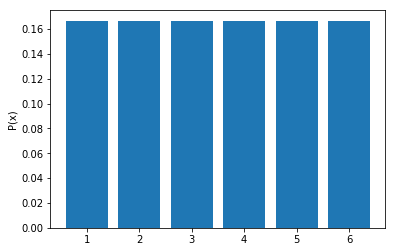

In [22]:
plt.bar(xx, rv.pmf(xx_ohe))
plt.ylabel("P(x)")

In [32]:
np.random.seed(1)
X = rv.rvs(1000)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]])

<Container object of 6 artists>

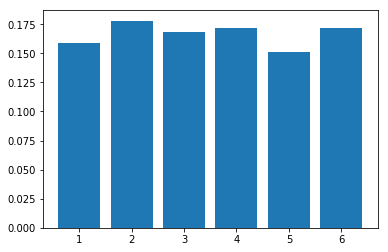

In [33]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1,7),y)

In [34]:
df = pd.DataFrame({"the": rv.pmf(xx_ohe), "sim": y}, index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,sim,0.159000
1,1,the,0.166667
2,2,sim,0.178000
3,2,the,0.166667
4,3,sim,0.168000
5,3,the,0.166667
6,4,sim,0.172000
7,4,the,0.166667
8,5,sim,0.151000
9,5,the,0.166667


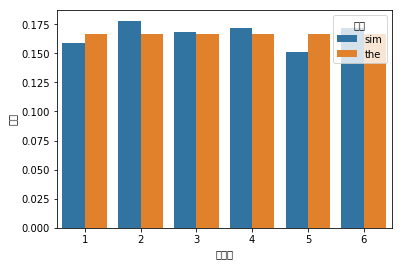

In [35]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

# 다항 분포

베르누이 시도를 여러번 하여 얻은 총 성공 횟수 합이 이항 분포를 이루는 것처럼 독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 다항 분포(Multinomial distribution)을 이룬다.

_ _

### 다항 분포의 시뮬레이션

In [37]:
N = 30
theta = [0,0,0.1,0.2,0.3,0.4]
rv = stats.multinomial(N,theta)

In [42]:
np.random.seed(0)
x = rv.rvs(100)
x[:5]

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

{'boxes': [<matplotlib.lines.Line2D at 0x2a9a2e78fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a9a2e785f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a9a32c2a58>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2a9a2e68470>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2a9a2e78e80>,
  <matplotlib.lines.Line2D at 0x2a9a2f5ddd8>]}

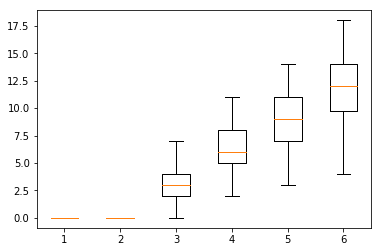

In [43]:
plt.boxplot(x)